In [3]:
%matplotlib inline

In [4]:
#Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
#Load in csv
cardata_df = pd.read_csv("../Robert/clean_car_data.csv")
cardata_df.head()

,Unnamed: 0,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,2020 Census Tract
0,1,5YJXCBE27J,Island,Greenbank,WA,98253,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,10.0,326880081,(-122.575569 48.08489),5.302997e+10
1,8,1N4BZ0CP8H,Chelan,Wenatchee,WA,98801,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,12.0,192768747,(-120.336499 47.425146),5.300796e+10
2,10,WVWKR7AU3K,Snohomish,Edmonds,WA,98026,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,125,32.0,477565112,(-122.333046 47.829439),5.306105e+10
3,11,5YJ3E1EB0J,Island,Clinton,WA,98236,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,10.0,476402678,(-122.35803 47.9796),5.302997e+10
4,13,5YJ3E1EBXL,Snohomish,Brier,WA,98036,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,1.0,103288153,(-122.281856 47.811678),5.306105e+10


In [6]:
#Filtering only the data needed
cars_only_df = cardata_df[["County","Electric Vehicle Type"]]


In [7]:
#Grouping electric cars by county
county_cars = cars_only_df.groupby('County', as_index=False)
county_cars.head()

,County,Electric Vehicle Type
0,Island,Battery Electric Vehicle (BEV)
1,Chelan,Battery Electric Vehicle (BEV)
2,Snohomish,Battery Electric Vehicle (BEV)
3,Island,Battery Electric Vehicle (BEV)
4,Snohomish,Battery Electric Vehicle (BEV)
...,...,...
33973,Garfield,Plug-in Hybrid Electric Vehicle (PHEV)
40539,Lincoln,Plug-in Hybrid Electric Vehicle (PHEV)
50780,Garfield,Plug-in Hybrid Electric Vehicle (PHEV)
64715,Garfield,Battery Electric Vehicle (BEV)


In [8]:
#Count of electric cars per county
cars_per_county = county_cars['Electric Vehicle Type'].count()


In [9]:
#Get total number of electric vehicles 
total_vehicles = cardata_df[['Electric Vehicle Type']].count()

In [10]:
#Getting percent data
pct_data = cars_per_county['percent'] = (cars_per_county['Electric Vehicle Type'] / (total_vehicles).sum()) * 100

In [11]:
#Getting max values
max_cardata_df = cars_per_county.sort_values(by=['Electric Vehicle Type'], ascending = False)
max_cardata_df.head(10)

,County,Electric Vehicle Type,percent
16,King,57360,52.557794
30,Snohomish,12018,11.011847
26,Pierce,8211,7.523571
5,Clark,6450,5.910003
33,Thurston,4035,3.697188
17,Kitsap,3770,3.454374
36,Whatcom,2763,2.531680
31,Spokane,2717,2.489532
2,Benton,1329,1.217736
14,Island,1280,1.172838


In [18]:
top_ten_df = cars_per_county.nlargest(10, 'Electric Vehicle Type')
top_ten_df.head()

,County,Electric Vehicle Type,percent
16,King,57360,52.557794
30,Snohomish,12018,11.011847
26,Pierce,8211,7.523571
5,Clark,6450,5.910003
33,Thurston,4035,3.697188


In [12]:
#Getting min values
min_cardata_df = cars_per_county.sort_values(by=['Electric Vehicle Type'], ascending = True)
min_cardata_df.head(10)

,County,Electric Vehicle Type,percent
11,Garfield,4,0.003665
6,Columbia,13,0.011912
9,Ferry,27,0.024740
21,Lincoln,28,0.025656
25,Pend Oreille,31,0.028405
0,Adams,35,0.032070
34,Wahkiakum,37,0.033902
1,Asotin,45,0.041233
29,Skamania,134,0.122781
32,Stevens,140,0.128279


In [21]:
bottom_ten_df = cars_per_county.nsmallest(10, 'Electric Vehicle Type')
bottom_ten_df.head(10)

,County,Electric Vehicle Type,percent
11,Garfield,4,0.003665
6,Columbia,13,0.011912
9,Ferry,27,0.024740
21,Lincoln,28,0.025656
25,Pend Oreille,31,0.028405
0,Adams,35,0.032070
34,Wahkiakum,37,0.033902
1,Asotin,45,0.041233
29,Skamania,134,0.122781
32,Stevens,140,0.128279


In [22]:
#Preparing pie chart data for max values 
max_vehicle_count = top_ten_df['Electric Vehicle Type'].tolist()
print(max_vehicle_count)
max_county_list = top_ten_df['County'].tolist()
print(max_county_list)

[57360, 12018, 8211, 6450, 4035, 3770, 2763, 2717, 1329, 1280]
['King', 'Snohomish', 'Pierce', 'Clark', 'Thurston', 'Kitsap', 'Whatcom', 'Spokane', 'Benton', 'Island']


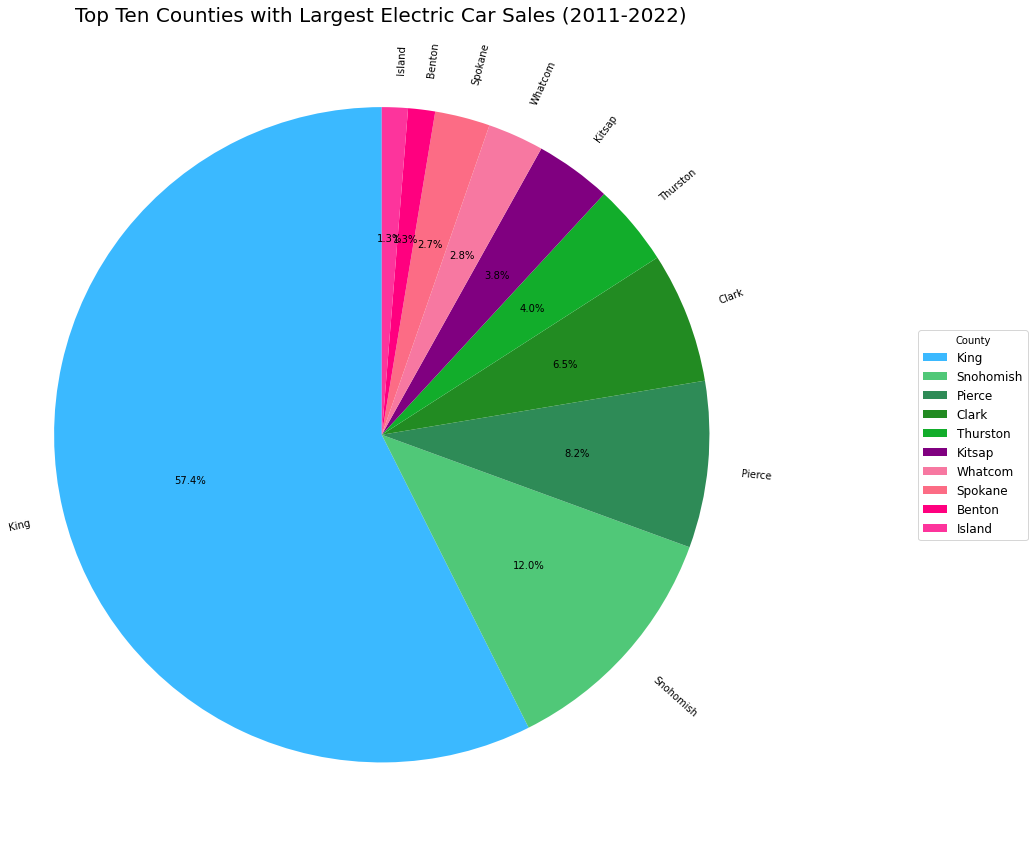

In [23]:
#Max value pie chart
sizes = max_vehicle_count
explode = [0,0,0,0,0,0,0,0,0,0]
colors = [
'#3BB9FF',
'#50C878',
'#2E8B57',
'#228B22',
'#12AD2B',
'#800080',
'#F778A1',
'#FC6C85',
'#FF007F',
'#FD349C',
]
plt.pie(sizes, explode=explode, labels = max_county_list,colors=colors, autopct='%.1f%%',rotatelabels=True, startangle=90,)

plt.title("Ten Counties with the Highest Electric Car Sales (2011-2022)",fontsize=20)
plt.legend(loc='right',bbox_to_anchor=(1.4,0.5),title = "County",fontsize=12)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(13,15)
fig.set_facecolor('white')
plt.savefig('Top_Ten_EC_Sales', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
#Preparing pie chart data for min values 
min_vehicle_count = bottom_ten_df['Electric Vehicle Type'].tolist()
print(min_vehicle_count)
min_county_list = bottom_ten_df['County'].tolist()
print(min_county_list)

[4, 13, 27, 28, 31, 35, 37, 45, 134, 140]
['Garfield', 'Columbia', 'Ferry', 'Lincoln', 'Pend Oreille', 'Adams', 'Wahkiakum', 'Asotin', 'Skamania', 'Stevens']


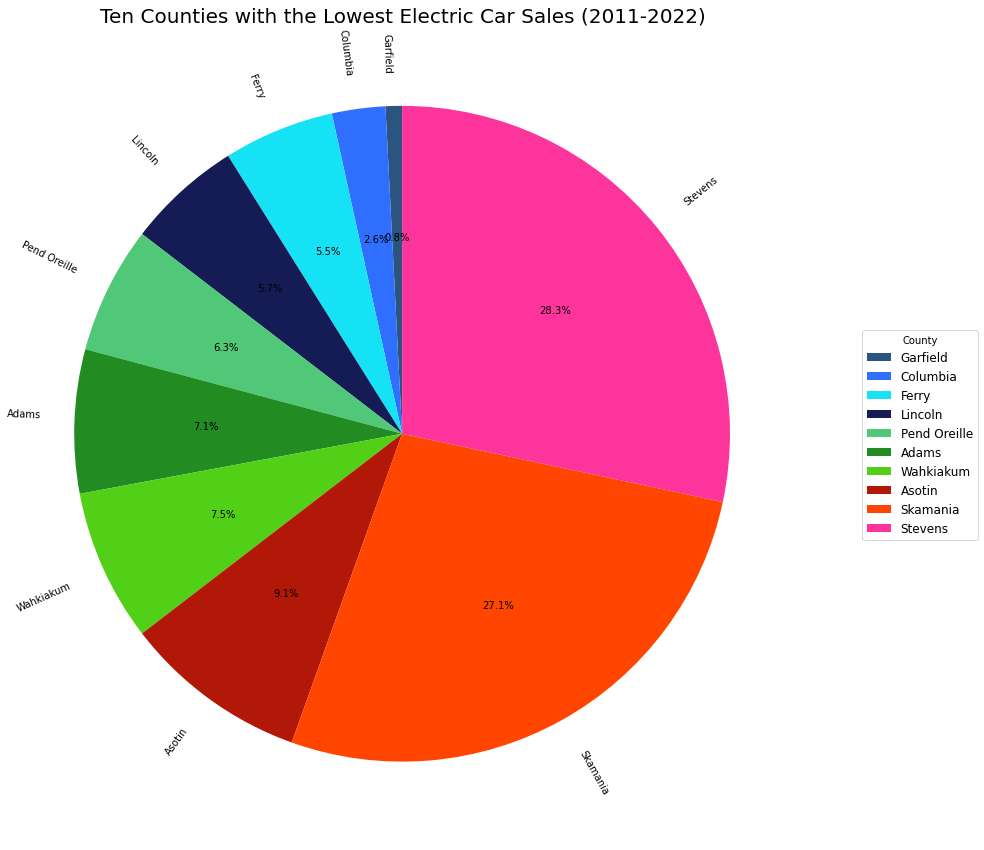

In [26]:
#Min value pie chart
sizes = min_vehicle_count
labels= min_county_list

explode = [0,0,0,0,0,0,0,0,0,0]
colors = ['#2B547E',
'#306EFF',
'#16E2F5',
'#151B54',
'#50C878',
'#228B22',
'#52D017',
'#B21807',
'#FF4500',
'#FD349C',
]
plt.pie(sizes, explode=explode, labels = labels,colors=colors, autopct='%.1f%%',rotatelabels=True, startangle=90,)

plt.title("Ten Counties with the Lowest Electric Car Sales (2011-2022)", fontsize=20)

plt.legend(loc='right',bbox_to_anchor=(1.3,0.5),title = "County",fontsize=12)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(13,15)
fig.set_facecolor('white')
plt.tight_layout
plt.savefig('Bottom_Ten_EC_Sales', dpi=300, bbox_inches='tight')
plt.show() 